In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [13]:
os.chdir("E:/Jupyter Notebook Simp/Dogs vs Cats")
if os.path.isdir('trained data/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat)
    os.makedirs(trained data/valid/dog)
    os.makedirs(trained data/valid/cat)
    for i in random.sample(glob.glob('cat*'),500):
        shutil.move(i,'train/cat')
    for i in random.sample(glob.glob('dog*'),500):
        shutil.move(i,'train/dog')
    for i in random.sample(glob.glob('cat*'), 100):
        shutil.move(i, 'valid/cat')        
    for i in random.sample(glob.glob('dog*'), 100):
        shutil.move(i, 'valid/dog')
    for i in random.sample(glob.glob('cat*'), 50):
        shutil.move(i, 'test/cat')      
    for i in random.sample(glob.glob('dog*'), 50):
        shutil.move(i, 'test/dog')
os.chdir('../../')

SyntaxError: invalid syntax (<ipython-input-13-1f149e7bf940>, line 3)

In [2]:
train_path='E:/Data-Science-Practice/Dogs vs Cats/trained data/train'
valid_path='E:/Data-Science-Practice/Dogs vs Cats/trained data/valid'
test_path='E:/Data-Science-Practice/Dogs vs Cats/trained data/test'
#directory paths for train,test and valid datas.

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_path,
                                                 target_size=(300,300),
                                                 batch_size=10,
                                                 class_mode='binary')

#normalizing the pixel values ranging from 0-256 in 0-1.And the dimensions of the cats and dogs images are 499x400
#which are reshaped to 300x300 and since there are 1000,200,100 images in the directories we will tke common factor of
#all these i.e. 10,20,50,100. And set the class mode in binary, the 'flow_from_directory' can seperate both cat and dog
#directory from each other and generate two class labels.

Found 1000 images belonging to 2 classes.


In [5]:
imgs,labels=next(train_generator)

#We now call next(train_batches) to generate a batch of images and labels from the training set.
#Note that the size of this batch is determined by the batch_size=10 we set when we created train_generator.
def plotImages(images_arr):
    fig,axes=plt.subplots(1,10,figsize=(20,20))
    for im,ax in zip(images_arr,axes):
        ax.imshow(im)
        
    plt.show()

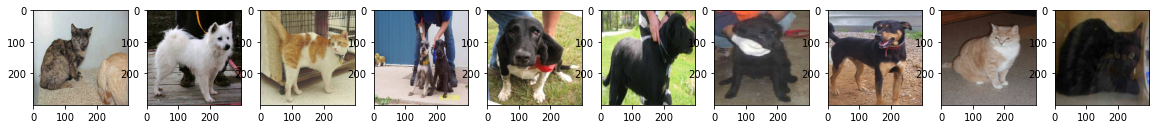

[0. 1. 0. 1. 1. 1. 1. 1. 0. 0.]


In [6]:
plotImages(imgs)
print(labels)
#{Cat:0,Dog:1}

In [7]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [9]:
import keras
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

In [10]:
test_datagen=ImageDataGenerator(rescale=1./255)
valid_generator=test_datagen.flow_from_directory(valid_path,
                                                 target_size=(300,300),
                                                batch_size=10,
                                                class_mode='binary')
test_generator=test_datagen.flow_from_directory(test_path,
                                               target_size=(300,300),
                                               batch_size=10,
                                               class_mode='binary')

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


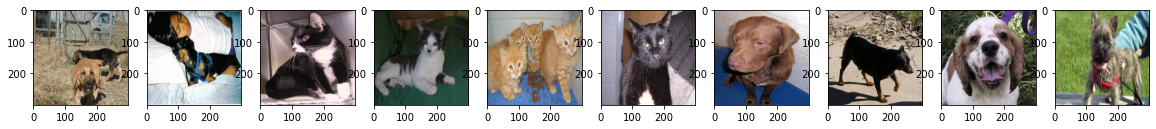

[1. 1. 0. 0. 0. 0. 1. 1. 1. 1.]


In [11]:
imgs_t,labels_t=next(test_generator)
plotImages(imgs_t)
print(labels_t)

In [12]:
history=model.fit_generator(train_generator,
                            steps_per_epoch=100,
                           epochs=5,validation_data=valid_generator,
                           validation_steps=20)
#steps_per_epoch=train_images=1000/batch_size=100

C:\Users\barna\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
100/100 [==============================] - 171s 2s/step - loss: 0.7215 - accuracy: 0.5052 - val_loss: 0.6968 - val_accuracy: 0.5000
Epoch 2/5
100/100 [==============================] - 160s 2s/step - loss: 0.6856 - accuracy: 0.5172 - val_loss: 0.6788 - val_accuracy: 0.5250
Epoch 3/5
100/100 [==============================] - 147s 1s/step - loss: 0.6866 - accuracy: 0.5401 - val_loss: 0.6751 - val_accuracy: 0.5000
Epoch 4/5
100/100 [==============================] - 144s 1s/step - loss: 0.6658 - accuracy: 0.6019 - val_loss: 0.6313 - val_accuracy: 0.6450
Epoch 5/5
100/100 [==============================] - 106s 1s/step - loss: 0.6193 - accuracy: 0.6663 - val_loss: 0.6205 - val_accuracy: 0.6150


In [13]:
model.evaluate(test_generator)

10/10 [==============================] - 2s 234ms/step - loss: 0.6094 - accuracy: 0.6300


[0.6093911528587341, 0.6299999952316284]

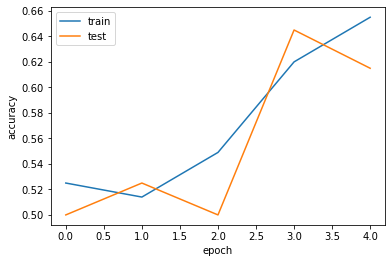

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
from keras.preprocessing import image

STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
#You need to reset the test_generator before whenever you call the predict_generator. 
#This is important, if you forget to reset the test_generator you will get outputs in a weird order.

pred=model.predict_generator(test_generator,steps=STEP_SIZE_TEST)
predictions=[]

for i in pred:
    if i>=0.5:
        predictions.append('dog')
    else:
        predictions.append('cat')

filenames=test_generator.filenames

C:\Users\barna\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [17]:
import pandas as pd
results=pd.DataFrame({'Filename':filenames,'Predictions':predictions})

results.tail(10)

,Filename,Predictions
90,dog\dog.7579.jpg,cat
91,dog\dog.7885.jpg,cat
92,dog\dog.8088.jpg,dog
93,dog\dog.8308.jpg,dog
94,dog\dog.8344.jpg,dog
95,dog\dog.8346.jpg,dog
96,dog\dog.8512.jpg,cat
97,dog\dog.8880.jpg,dog
98,dog\dog.9532.jpg,cat
99,dog\dog.9815.jpg,cat
